In [1]:
import pandas as pd
import numpy as np

import string
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
data=pd.read_csv("data\\text_emotion.csv")

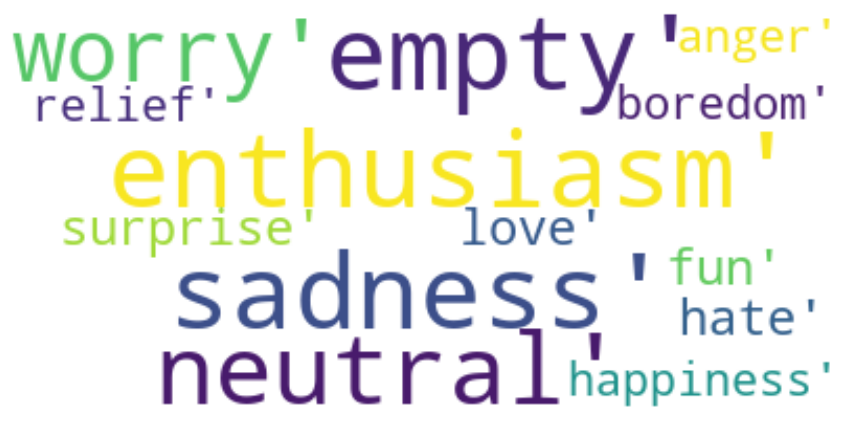

In [3]:
wordcloud_status=WordCloud(background_color="white", max_font_size=50, max_words=100).generate(str(data['sentiment'].unique()))

plt.figure(figsize = (15,15))
plt.imshow(wordcloud_status, interpolation='bilinear')
plt.axis("off")
plt.show()

In [4]:
data=pd.read_csv("data\\clean_data.csv",encoding="latin-1")

In [5]:
# Dropping rows with other emotion labels
#data = data.drop(data[data.sentiment == 'anger'].index)
#data = data.drop(data[data.sentiment == 'boredom'].index)
#data = data.drop(data[data.sentiment == 'enthusiasm'].index)
data = data.drop(data[data.sentiment == 'empty'].index)
data = data.drop(data[data.sentiment == 'fun'].index)
data = data.drop(data[data.sentiment == 'relief'].index)
data = data.drop(data[data.sentiment == 'surprise'].index)
#data = data.drop(data[data.sentiment == 'love'].index)
data = data.drop(data[data.sentiment == 'hate'].index)
#data = data.drop(data[data.sentiment == 'neutral'].index)
#data = data.drop(data[data.sentiment == 'worry'].index)
data

,tweet_id,sentiment,status
1,1956967666,sadness,layin n bed headache ughh waitin call
2,1956967696,sadness,funeral ceremony gloomy friday
3,1956967789,enthusiasm,want hang friend soon
4,1956968416,neutral,dannycastillo want trade someone houston ticke...
5,1956968477,worry,pinging go prom bc bf like friend
...,...,...,...
39995,1753918954,neutral,johnlloydtaylor
39996,1753919001,love,happy mother day love
39997,1753919005,love,happy mother day mommy woman man long momma so...
39998,1753919043,happiness,niariley wassup beautiful follow peep new hit ...


In [6]:
res=pd.DataFrame()

C:\Users\Shuvo Podder\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Shuvo Podder\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


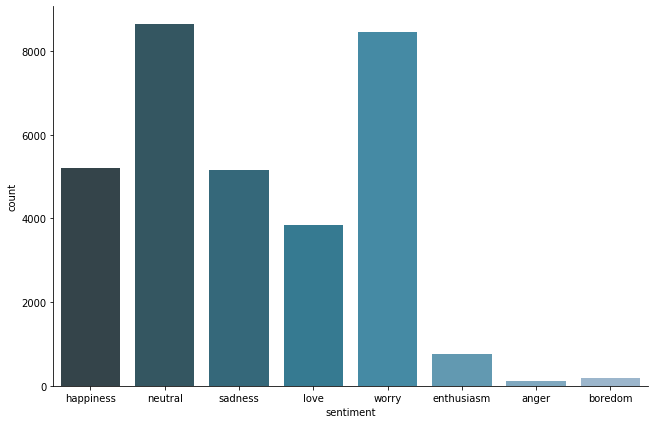

In [7]:
data = data.reindex(np.random.permutation(data.index))
data = data[['status', 'sentiment']]
sns.factorplot(x="sentiment", data=data, kind="count", size=6, aspect=1.5, palette="PuBuGn_d")
plt.show();

In [8]:

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer

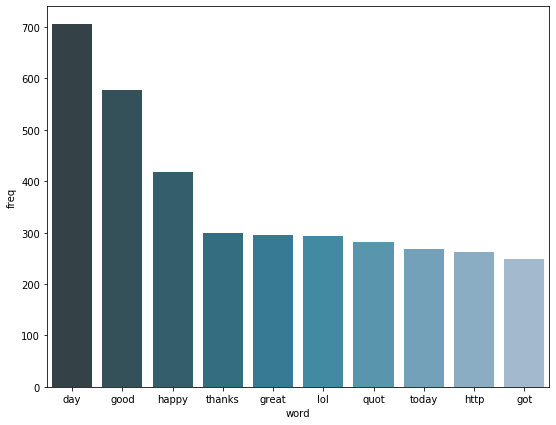

In [9]:
df=pd.DataFrame()
df=data[data.sentiment=='happiness']
sr_clean=df['status'].values.astype('U')
cv = CountVectorizer()
bow = cv.fit_transform(sr_clean)
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(10), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(9, 7))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.show();


word_counter_df['status']='happiness'
res=pd.concat([res,word_counter_df])

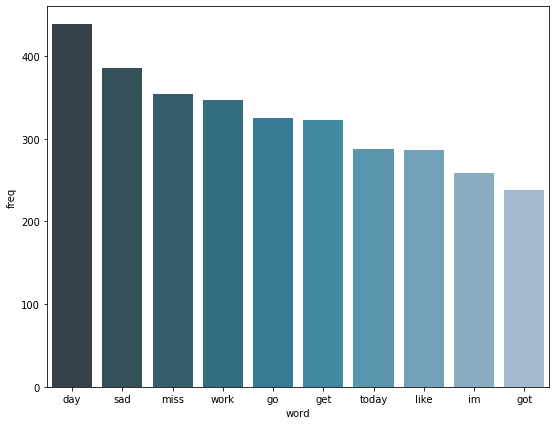

In [10]:
sad=pd.DataFrame()
sad=data[data.sentiment=='sadness']
sr_clean=sad['status'].values.astype('U')
cv = CountVectorizer()
bow = cv.fit_transform(sr_clean)
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(10), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(9, 7))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.show();


word_counter_df['status']='sadness'
res=pd.concat([res,word_counter_df])

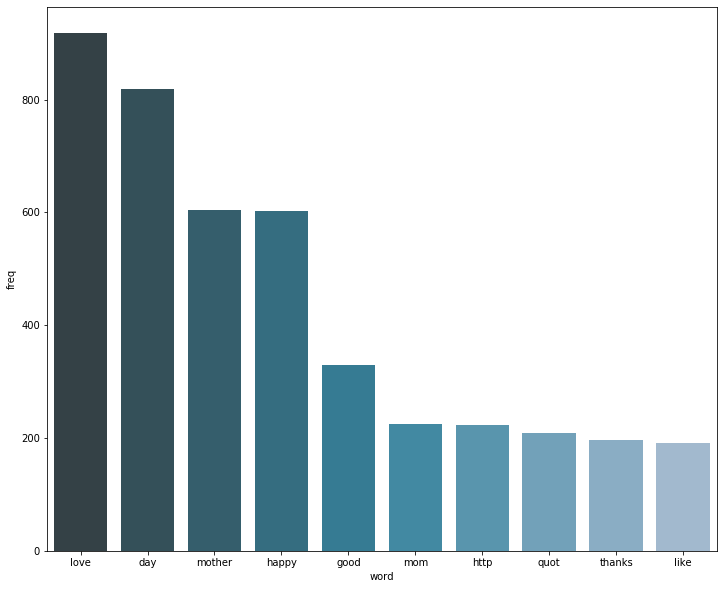

In [11]:
luv=pd.DataFrame()
luv=data[data.sentiment=='love']
sr_clean=luv['status'].values.astype('U')
cv = CountVectorizer()
bow = cv.fit_transform(sr_clean)
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(10), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.show();


word_counter_df['status']='love'
res=pd.concat([res,word_counter_df])